# <font color='blue'> Table Of Contents </font>


### <font color='blue'> Single Responsibility Principle (SRP) </font>

### <font color='blue'> Open Closed Principle (OCP) </font>


### <font color='blue'> Liskov Substitution Principle (LSP) </font>

### <font color='blue'> Interface Segregation Principle (ISP) </font>

### <font color='blue'> Dependency Inversion Principle (DIP) </font>

# <font color='blue'> Single Responsibility Principle (SRP) </font>
#### <p>
Classes should be more cohesive and should have less coupling.
As per SRP, function which change together should exist together.
For example, We should have separate class for handing data and healthcheck in UHC. Separate class for configuration.

We need to segegrate only when class are bond to change and may cause ridity and code duplication.
</p>

## <font color='blue'> Without SRP </font>

In [ ]:
class Modem:
    def connect(self, ph_no):
        pass

    def disconnect(self):
        pass

    def send(self, data):
        pass

    def recv(self):
        pass

class PhonePacketModem(Modem):
    def connect(self, ph_no):
        print("PhonePacketModem: Dial phone")

    def disconnect(self):
        print("PhonePacketModem: Hangup phone")

    def send(self, data):
        print("PhonePacketModem: Send packet")

    def recv(self):
        print("PhonePacketModem: Receive packet")

class PhoneStreamModem(Modem):
    def connect(self, ph_no):
        print("PhoneStreamModem: Dial phone")

    def disconnect(self):
        print("PhoneStreamModem: Hangup phone")

    def send(self, data):
        print("PhoneStreamModem: Send stream")

    def recv(self):
        print("PhoneStreamModem: Receive stream")

class BroadbandPacketModem(Modem):
    def connect(self, ph_no):
        print("BroadbandPacketModem: Dial Broadband")

    def disconnect(self):
        print("BroadbandPacketModem: Hangup Broadband")

    def send(self, data):
        print("BroadbandPacketModem: Send packet")

    def recv(self):
        print("BroadbandPacketModem: Receive packet")

class BroadbandStreamModem(Modem):
    def connect(self, ph_no):
        print("BroadbandStreamModem: Dial Broadband")

    def disconnect(self):
        print("BroadbandStreamModem: Hangup Broadband")

    def send(self, data):
        print("BroadbandStreamModem: Send stream")

    def recv(self):
        print("BroadbandStreamModem: Receive stream")


# Client
if __name__ == '__main__':

# since objects holders are different we connections and communication have to be called separately
# which is not flexible design (irritating!)
    ppm = PhonePacketModem()
    psm = PhoneStreamModem()
    bbpm = BroadbandPacketModem()
    bbsm = BroadbandStreamModem()
    print("No SRP")

No SRP


## <font color='blue'> With SRP </font>

In [ ]:
# splitting Modem into connection and Datachannel interfaces
class Datachannel:
    def send(self, ch_data):
        pass

    def recv(self):
        pass

class Connection:
    def connect(self, ph_no):
        pass

    def disconnect(self):
        pass


class PacketDataChannel(Datachannel):
    def send(self, ch_data):
        print("PacketDataChannel: Send packet")

    def recv(self):
        print("PacketDataChannel: Receive packet")

class StreamDataChannel(Datachannel):
    def send(self, ch_data):
        print("StreamDataChannel: Send packet")

    def recv(self):
        print("StreamDataChannel: Receive packet")

class PhoneConnection(Connection):
    def connect(self, ph_no):
        print("PhoneConnection: Dial phone")

    def disconnect(self):
        print("PhoneConnection: Hangup phone")

class BroadbandConnection(Connection):
    def connect(self, ph_no):
        print("BroadbandConnection: Dial Broadband")

    def disconnect(self):
        print("BroadbandConnection: Hangup Broadband")

# With this FlexiModem interface it is possible to mix and match the connection and communication types
# This SRP increases the flexibility
class FlexiModem:
    def __init__(self, Connection, Datachannel):
        self.connection = Connection
        self.datachannel = Datachannel

    def do_connection(self):
        self.connection.connect("121.55.825.56")
        self.datachannel.send("55")
        self.datachannel.recv()
        self.connection.disconnect()


# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    flexi_modem = []
    fm1 = FlexiModem(BroadbandConnection(), PacketDataChannel())
    fm2 = FlexiModem(BroadbandConnection(), StreamDataChannel())
    fm3 = FlexiModem(PhoneConnection(), PacketDataChannel())
    fm4 = FlexiModem(PhoneConnection(), StreamDataChannel())
    flexi_modem.append(fm1)
    flexi_modem.append(fm2)
    flexi_modem.append(fm3)
    flexi_modem.append(fm4)


    for fm in flexi_modem:
        fm.do_connection()

BroadbandConnection: Dial Broadband
PacketDataChannel: Send packet
PacketDataChannel: Receive packet
BroadbandConnection: Hangup Broadband
BroadbandConnection: Dial Broadband
StreamDataChannel: Send packet
StreamDataChannel: Receive packet
BroadbandConnection: Hangup Broadband
PhoneConnection: Dial phone
PacketDataChannel: Send packet
PacketDataChannel: Receive packet
PhoneConnection: Hangup phone
PhoneConnection: Dial phone
StreamDataChannel: Send packet
StreamDataChannel: Receive packet
PhoneConnection: Hangup phone


# <font color='blue'> Open Closed Principle (OCP) </font>
#### <p>
- Class core behavior should not change and it can only be extended.
- It means add any functionality, we have to make changes at lot of places and it could also be in core functionality. So if we need to add new feature, we may have to reship whole application again.
- By applying concept of abstract, we can add more functionality and client can call new methods at run time. New subclass can implement this abstraction and old class do not require changes.
- Strategy Pattern or Factory pattern (New implementation can be called at run time)
- But over doing abstraction can also cause complexity.
</p>

## <font color='blue'> Without OCP </font>

In [ ]:
import enum

class ShapeType(enum.Enum):
    circle = 1
    square = 2

# square
class Square:
    def __init__(self, type, side, topleft):
        self.type = type
        self.side = side
        self.topleft = topleft

# circle
class Circle:
    def __init__(self, type, radius, center):
        self.type = type
        self.radius = radius
        self.center = center

# square
def draw_square():
     print("Drawing Square")

def draw_circle():
        print("Drawing Circle")

# increases complexity if more shapes are added
# violates OCP as it needs modification to support another shape (extension)
def DrawAllShapes(shape):
    if shape == ShapeType.square:
        draw_square()
    elif shape == ShapeType.circle:
        draw_circle()


if __name__ == '__main__':
    for shape in (ShapeType):
        DrawAllShapes(shape)

Drawing Circle
Drawing Square


## <b>So here if we need to add new function to draw triangle, we have to make changes to all place. It is not posible to extend the draw behaviour</b>

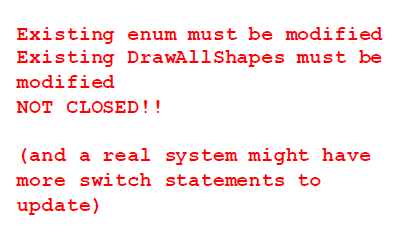

In [ ]:
import enum

class ShapeType(enum.Enum):
    circle = 1
    square = 2
    triangle = 3

# square
class Square:
    def __init__(self, type, side, topleft):
        self.type = type
        self.side = side
        self.topleft = topleft

# circle
class Circle:
    def __init__(self, type, radius, center):
        self.type = type
        self.radius = radius
        self.center = center

# circle
class Triangle:
    def __init__(self, type, base , height ):
        self.type = type
        self.base = base
        self.height = height

# square
def draw_square():
     print("Drawing Square")

def draw_circle():
        print("Drawing Circle")
        
def draw_triangle():
        print("Drawing Triangle")
# increases complexity if more shapes are added
# violates OCP as it needs modification to support another shape (extension)
def DrawAllShapes(shape):
    if shape == ShapeType.square:
        draw_square()
    elif shape == ShapeType.circle:
        draw_circle()
    elif shape == ShapeType.triangle:
        draw_triangle()


if __name__ == '__main__':
    for shape in (ShapeType):
        DrawAllShapes(shape)

## <font color='blue'> With OCP </font>

In [ ]:
class Shape:
    def Draw(self):
        pass

# square
class Square(Shape):
    def Draw(self):
        print("Drawing Square")

# clrcle
class Circle(Shape):
    def Draw(self):
        print("Drawing Circle")

# triangle
# Open for extension for a new shape
class Triangle(Shape):
    def Draw(self):
        print("Drawing Triangle")

# closed for  modification
def DrawAllShapes(shapes):
    for shape in shapes:
        shape.Draw()

if __name__ == '__main__':
    shapes = []
    shapes.append(Square())
    shapes.append(Circle())
    shapes.append(Triangle())

    DrawAllShapes(shapes)

Drawing Square
Drawing Circle
Drawing Triangle


# <font color='blue'> Liskov Substitution Principle (LSP) </font>
### <p>
- Subtype should be substitutable for their base type. Meaning subclass should inherit all behaviour of base class. And they can be used interchangabily. Everything true of parent class should be true for subclass.
- So here we should never redefin inherited non-virtual method. Meaning we should always use base class implementation of non-virtual method.
- In below example for ebook,restock in not a validate option. So when we inherit ebook with this call, restock need not be implemented, thus not all feature of base class is being implemented in subclass.
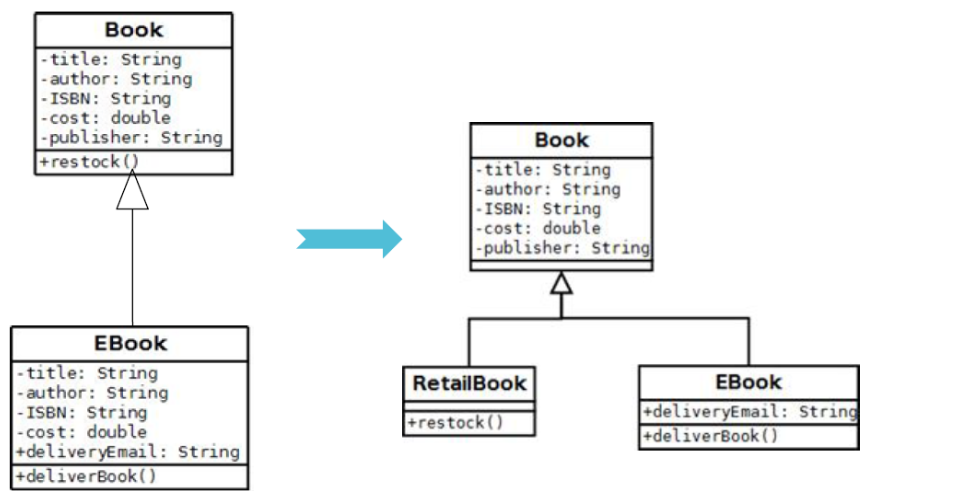

</p>

## <font color='blue'> Without LSP </font>

- Here height and width of square is same. so we really do not see height and width implementation. 
- Now in this case we have to implement both as base class both implementation

In [ ]:
class Rectangle:
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def set_width(self, width):
        self.width = width

    def set_height(self, height):
        self.height = height

    def get_width(self):
        return width

    def get_height(self):
        return height

    def get_area(self):
        return height * width

class Square(Rectangle):
    def __init__(self, width, height):
        super().__init__(width, height)

# which of the following functions can be used to set the side of a square?
    def set_width(self, width):
        super().set_width(width)

    def set_height(self, height):
        super().set_height(height)


if __name__ == '__main__':
    square = Square(5,4)
    square.set_width(5)

## <font color='blue'> With LSP </font>

In [ ]:
class shape:
    def __init__(self):
        pass

# Get area has to be moved to base class so that clients can have their own implementations.
# and the behaviour across child implementations are consistent which follows LSP
    def get_area(self):
        pass

class Rectangle(shape):
    def __init__(self, width, height):
        self.width = width
        self.height = height

    def get_width(self):
        return width

    def set_width(self, width):
        self.width = width

    def get_height(self):
        return height

    def set_height(self, height):
        self.height = height

    def get_area(self):
        return self.height * self.width

class Square(shape):
    def __init__(self, width):
        self.width = width

    def get_width(self):
        return width

    def set_width(self, width):
        self.width = width

    def get_area(self):
        return self.width * self.width


if __name__ == '__main__':
    rectangle = Rectangle(5,4)
    square = Square(5)
    print(rectangle.get_area())
    print(square.get_area())

20
25


# <font color='blue'> Interface Segregation Principle (ISP) </font>

- The interface segregation principle makes us understand that it is unnecessary and unreasonable to create an interface with a lot of methods as some of these methods may be irrelevant to the needs of a particular user when extended.
- It means interface or class should contain only those method by which subclass need not skip any implementation of base class. In code example we have segrated flying behaviour from bird interface as not all birds can fly. And FlyingBird class inherit bird class as all birds which can fly also has feature of bird interface, so we have mult-level inhertiance.

## <font color='blue'> Without ISP </font>

In [ ]:
class Animal:
    def swim(self):
        pass
    def purr(self):
        pass
    def bark(self):
        pass
    def fly(self):
        pass

class Cat(Animal):
    def swim(self):
        print("Cat is swimming")

    def purr(self):
        print("purr purr purr")

    def bark(self):
        print("Undefined behaviour")

if __name__ == '__main__':
    c = Cat()
    c.bark()

Undefined behaviour


## <font color='blue'> With ISP </font>

In [ ]:
class Bird:
    def chirp(self):
        pass
    def eat(self):
        pass
    def walk(self):
        pass

# Abstract (again) the non consistent behavior
class FlyingBird(Bird):
    def fly(self):
        pass

class Penguin(Bird):
    def chirp(self):
        print("chirp")

    def eat(self):
        print("eat")

    def walk(self):
        print("walk")

class Magpie(FlyingBird):
    def chirp(self):
        print("chirp")

    def eat(self):
        print("eat")

    def walk(self):
        print("walk")

    def fly(self):
        print("fly")

if __name__ == '__main__':
    penguin = Penguin()
    magpie = Magpie()
    penguin.eat()
    magpie.fly()

eat
fly


## Another exmaple

In [3]:
class Teacher:
    def Teach():
        pass

# English teacher interface
class EnglishTeacher (Teacher):
    def English():
        pass


class BiologyTeacher (Teacher):
    def Bilogy():
        pass

class ChemistryTeacher  (Teacher):
    def Bilogy():
        pass
    
class MathematicsTeacher   (Teacher):
    def Bilogy():
        pass
    
class Jane (EnglishTeacher):
    
    def Teach(self):
        print("Jane has started teaching.")

    def English(self):
        print("Jane is teaching the students English language.")
    
if __name__ == '__main__':
    jane = Jane()
    jane.Teach()
    jane.English()


Jane has started teaching.
Jane is teaching the students English language.


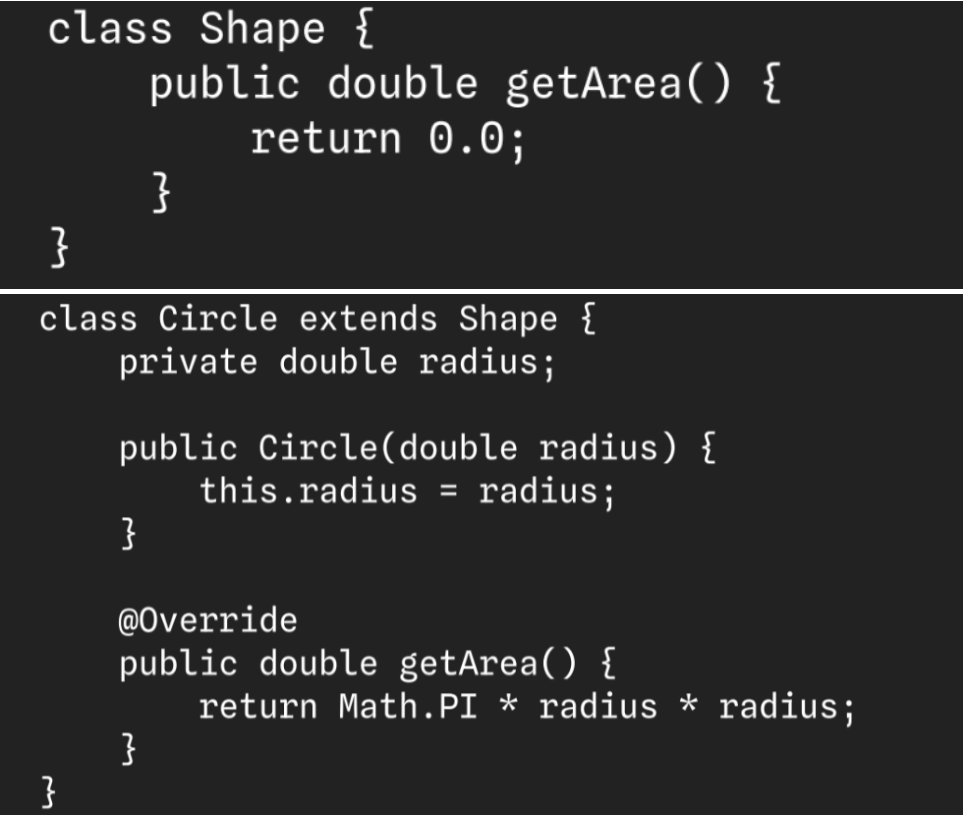
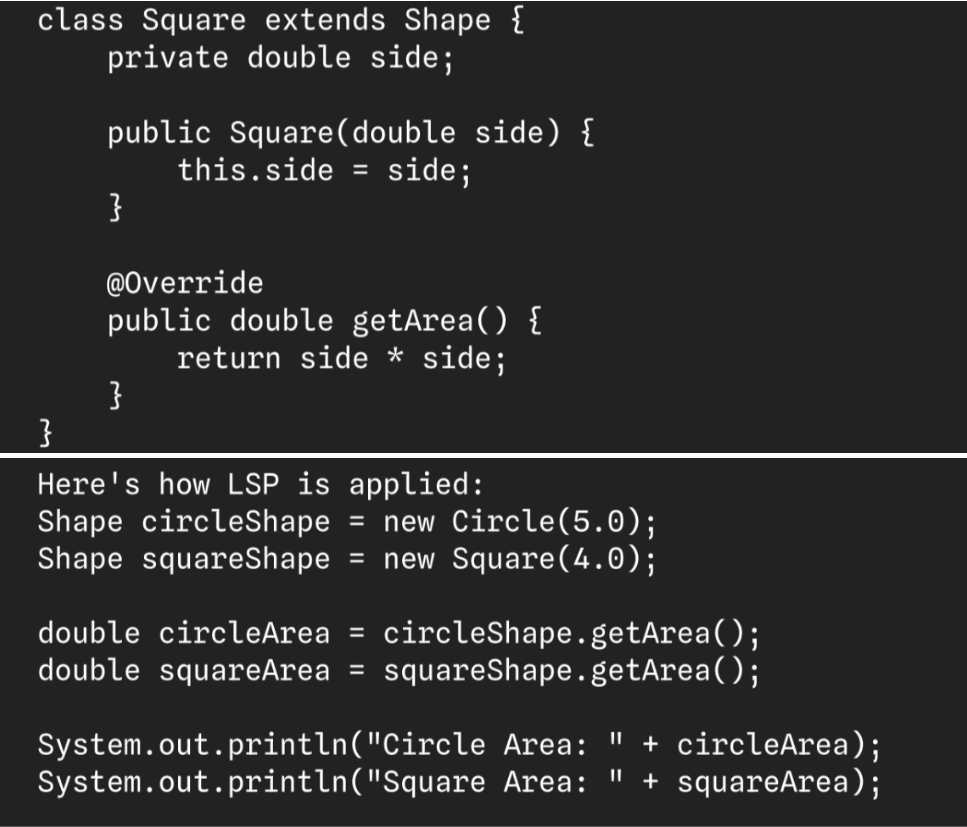



# <font color='blue'> Dependency Inversion Principle (DIP) </font>

- High-level modules should not import anything from low-level modules. Both should depend on abstractions (e.g., interfaces).
- Abstractions should not depend on details. Details (concrete implementations) should depend on abstractions.

```
public interface ATM {
    void ATM_OPERATION();
}


public class Bank implements ATM {
    @Override
    ATM_OPERATION(){
        // code to add money to ATM and increase the ATM balance
    }
}


public class Customer implements ATM {
    
    @Override
    ATM_OPERATION(){
        // code to withdraw money from ATM and decrease the ATM balance
    }
}

```

## <font color='blue'> Without DIP </font>

In [ ]:
class DataAccessLayer:
    def __init__(self):
        return

    def get_cust_name(self, id):
        return "Dummy customer"
    # read from data base for a real application

class BusinessLayer:
    def __init__(self):
        return

    def get_cust_name(self, id):
        data_access_layer = DataAccessLayer()
        return data_access_layer.get_cust_name(id)

if __name__ == '__main__':
    business_layer = BusinessLayer()
    print(business_layer.get_cust_name(1))

Dummy customer


## <font color='blue'> With DIP </font>

In [ ]:
class ICustData:
    def GetCustomerName(self, id):
        pass

class CustData(ICustData):
    def __init__(self):
        return

    def get_cust_name(self, id):
        return "Dummy customer"
    # read from data base for a real application

class DataAccess:
    @staticmethod
    def get_customer_data():
        return CustData()

class BusinessLayer:
    def __init__(self):
        self.customer_data_access = DataAccess.get_customer_data()

    def get_cust_name(self, id):
        return self.customer_data_access.get_cust_name(id)

if __name__ == '__main__':
    business_layer = BusinessLayer()
    print(business_layer.get_cust_name(1))

Dummy customer
